In [1]:
import numpy as np
import os
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils import *

In [2]:
path = '../Data/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios'

In [3]:
all_files_path = []
for folder in os.listdir(path):
    subpath = path + '/' + folder
    # print(return_final_folder(subpath))
    all_files_path.append(return_final_folder(subpath))

In [4]:
all_files_path

['../Data/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-Honeypot-Capture-4-1/bro/conn.log.labeled',
 '../Data/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-Honeypot-Capture-5-1/bro/conn.log.labeled',
 '../Data/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-Honeypot-Capture-7-1/Somfy-01/bro/conn.log.labeled',
 '../Data/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-1-1/bro/conn.log.labeled',
 '../Data/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-17-1/bro/conn.log.labeled',
 '../Data/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-20-1/bro/conn.log.labeled',
 '../Data/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-21-1/bro/conn.log.labeled',
 '../Data/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-3-1/bro/

In [5]:
files = ['Malware-Capture-7-1','-1-1','-3-1','-8-1']

In [6]:
req_files = []

In [7]:
for file in files:
    req_files.extend([path for path in all_files_path if re.search(file, path)])

In [8]:
req_files

['../Data/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-7-1/bro/conn.log.labeled',
 '../Data/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-1-1/bro/conn.log.labeled',
 '../Data/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-3-1/bro/conn.log.labeled',
 '../Data/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-8-1/bro/conn.log.labeled']

In [9]:
data = preprocess_data(req_files)

Files Loaded:../Data/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-7-1/bro/conn.log.labeled
Files Loaded:../Data/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-1-1/bro/conn.log.labeled
Files Loaded:../Data/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-3-1/bro/conn.log.labeled
Files Loaded:../Data/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-8-1/bro/conn.log.labeled


In [10]:
#data.pop('ts')

In [11]:
data.dtypes

id.orig_h           int32
id.orig_p           int32
id.resp_h           int32
id.resp_p           int32
proto               int32
duration          float32
orig_bytes          int32
resp_bytes          int32
missed_bytes        int32
orig_pkts           int32
orig_ip_bytes       int32
resp_pkts           int32
resp_ip_bytes       int32
detailed-label     object
dtype: object

In [12]:
data['detailed-label'].value_counts()

Okiru                        11333397
PartOfAHorizontalPortScan      685062
Benign                         551947
DDoS                            39584
C&C                              8238
Attack                           5962
C&C-HeartBeat                    5778
Name: detailed-label, dtype: int64

In [13]:
data['detailed-label'].unique()

array(['Benign', 'C&C-HeartBeat', 'Okiru', 'DDoS',
       'PartOfAHorizontalPortScan', 'C&C', 'Attack'], dtype=object)

In [14]:
det_label = data['detailed-label']

In [15]:
y_labels = LabelEncoder().fit_transform(data.pop('detailed-label'))

In [16]:
y_labels

array([1, 1, 1, ..., 2, 1, 1])

In [17]:
xlabels = np.array(data)

In [18]:
xlabels.shape

(12629968, 13)

In [19]:
for i in range(xlabels.shape[1]):
    xlabels[:,i] = (xlabels[:,i] - xlabels[:,i].mean())/xlabels[:,i].std()

In [20]:
xlabels

array([[-2.28105482e-02, -3.35185259e-01,  4.63004344e-01, ...,
         1.63845678e+01, -1.14920606e-02, -1.95085948e-02],
       [-2.28105482e-02,  3.71906504e+00, -7.69474389e-02, ...,
         9.48127289e-01,  1.07284409e+00,  1.80088811e+00],
       [-2.28105482e-02,  3.68688386e+00, -7.69474389e-02, ...,
         9.48127289e-01,  1.07284409e+00,  2.83060745e+00],
       ...,
       [-1.93435452e-02,  2.38648268e+00, -1.24604750e+00, ...,
         1.12504322e-01, -1.14920606e-02, -1.95085948e-02],
       [-1.93435452e-02, -7.67852614e-01, -8.85138084e-01, ...,
         2.93179558e-01,  5.30676014e-01,  6.79229533e-01],
       [-1.93435452e-02, -7.67852614e-01, -8.83650850e-01, ...,
         2.93179558e-01,  5.30676014e-01,  6.79229533e-01]])

In [21]:
model = tf.keras.Sequential([tf.keras.layers.Dense(13),
                             tf.keras.layers.Dense(13,activation='relu'),
                             tf.keras.layers.Dense(64,activation='tanh'),
                             tf.keras.layers.Dense(64,activation='relu'),
                             tf.keras.layers.Dense(1)])

In [22]:
from tensorflow.keras.metrics import PrecisionAtRecall,Accuracy,MeanAbsoluteError,FalseNegatives,SparseCategoricalCrossentropy

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(),MeanAbsoluteError(),
                       tf.keras.metrics.Accuracy()])

In [24]:
model.fit(xlabels,y_labels,batch_size=16384,epochs=15)

Train on 12629968 samples
Epoch 1/15
12629968/12629968 [==============================] - 9s 1us/sample - loss: 0.2671 - root_mean_squared_error: 0.5168 - mean_absolute_error: 0.1167 - accuracy: 1.2272e-05
Epoch 2/15
12629968/12629968 [==============================] - 6s 0us/sample - loss: 0.0408 - root_mean_squared_error: 0.2020 - mean_absolute_error: 0.0359 - accuracy: 1.1797e-05
Epoch 3/15
12629968/12629968 [==============================] - 5s 0us/sample - loss: 0.0347 - root_mean_squared_error: 0.1862 - mean_absolute_error: 0.0402 - accuracy: 7.0467e-06
Epoch 4/15
12629968/12629968 [==============================] - 5s 0us/sample - loss: 0.0323 - root_mean_squared_error: 0.1798 - mean_absolute_error: 0.0382 - accuracy: 7.3634e-06
Epoch 5/15
12629968/12629968 [==============================] - 5s 0us/sample - loss: 0.0308 - root_mean_squared_error: 0.1754 - mean_absolute_error: 0.0392 - accuracy: 6.0174e-06
Epoch 6/15
12629968/12629968 [==============================] - 6s 0us/sam

In [25]:
history = model.history.history

In [26]:
history

{'loss': [0.26708346669158733,
  0.04078603799745861,
  0.034653018467889866,
  0.03234555284707467,
  0.030762440519984606,
  0.029710335293946927,
  0.02885928560314383,
  0.02760156305570279,
  0.027336652126978424,
  0.02667490677102787,
  0.026587668356189715,
  0.03051317277896573,
  0.027393554336207777,
  0.027807133282469768,
  0.026510293611497177],
 'root_mean_squared_error': [0.51680124,
  0.20195557,
  0.1861532,
  0.17984866,
  0.17539224,
  0.17236684,
  0.16988023,
  0.16613717,
  0.16533795,
  0.1633245,
  0.16305727,
  0.17468017,
  0.16551,
  0.16675468,
  0.16281983],
 'mean_absolute_error': [0.1166953,
  0.035851795,
  0.040246792,
  0.038228396,
  0.03921704,
  0.039280955,
  0.038057797,
  0.035234507,
  0.032871947,
  0.03375883,
  0.031031543,
  0.034772858,
  0.0207531,
  0.02518332,
  0.029619878],
 'accuracy': [1.2272399e-05,
  1.1797338e-05,
  7.046732e-06,
  7.363439e-06,
  6.0174343e-06,
  4.1171916e-06,
  7.4426157e-06,
  5.8590804e-06,
  8.155207e-06,
 

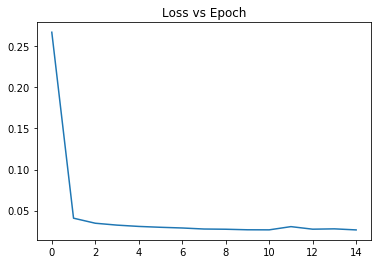

In [27]:
plt.plot(history['loss'])
plt.title('Loss vs Epoch')
plt.savefig('LossvsEpoch')

In [28]:
#tf.keras.backend.clear_session()

In [29]:
model.save('IOT_Network_Analyzer')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: IOT_Network_Analyzer\assets


In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(xlabels,y_labels, test_size=0.2)

In [31]:
y_pred = model.predict(xtest, batch_size=16384)

In [32]:
y_pred = np.around(y_pred)

In [33]:
for i in range(0,8):
    print(i,(y_pred == i).sum())

0 1210
1 107262
2 998
3 1833
4 8248
5 2271737
6 134700
7 1


In [34]:
for i in range(0,8):
    print(i,(ytest == i).sum())

0 1192
1 110244
2 1676
3 1132
4 8007
5 2267321
6 136422
7 0


In [35]:
for i in range(0,8):
    print(i,(y_labels == i).sum())

0 5962
1 551947
2 8238
3 5778
4 39584
5 11333397
6 685062
7 0


In [36]:
#Okiru                        11333397
#PartOfAHorizontalPortScan      685062
#Benign                         551947
#DDoS                            39584
#C&C                              8238
#Attack                           5962
#C&C-HeartBeat                    5778

|Virus | Label|
------|------
|Okiru  |  5|
PartOfAHorizontalPortScan  |  6
Benign  |  1
DDoS  |  4
C&C  |  2
Attack  |  0
C&C-Heartbreak  |  3

In [37]:
result = []

In [38]:
result = [y_pred[i] == ytest[i] for i in range(ytest.shape[0])]

In [39]:
result = np.array(result)

In [40]:
true = (result == True).sum()

In [41]:
false = (result == False).sum()

In [42]:
total = result.shape[0]

In [43]:
total

2525994

In [44]:
true/total 

0.9965617495528493

In [45]:
false/total

0.0034382504471507057

In [46]:
from sklearn.metrics import f1_score, roc_auc_score,recall_score,precision_score

In [47]:
pscore = precision_score(ytest,y_pred,average=None)
pscore

array([0.        , 0.96280992, 0.99954317, 0.        , 0.60883797,
       0.9707808 , 0.99802706, 0.98406088, 0.        ])

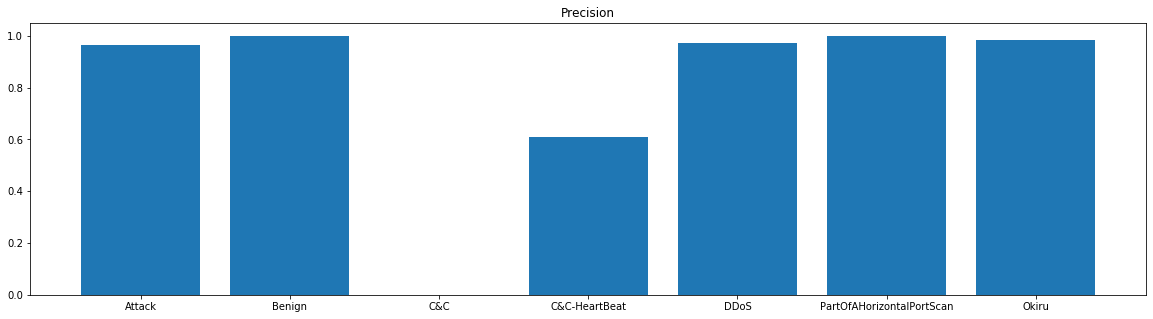

In [50]:
plt.figure(figsize=(20,5))
plt.bar(labels,pscore[1:8])
plt.title('Precision')
plt.savefig('Precision')

In [51]:
rscore = recall_score(ytest,y_pred,average=None)
rscore

d:\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.97734899, 0.97250644, 0.        , 0.98586572,
       1.        , 0.99997089, 0.97163947, 0.        ])

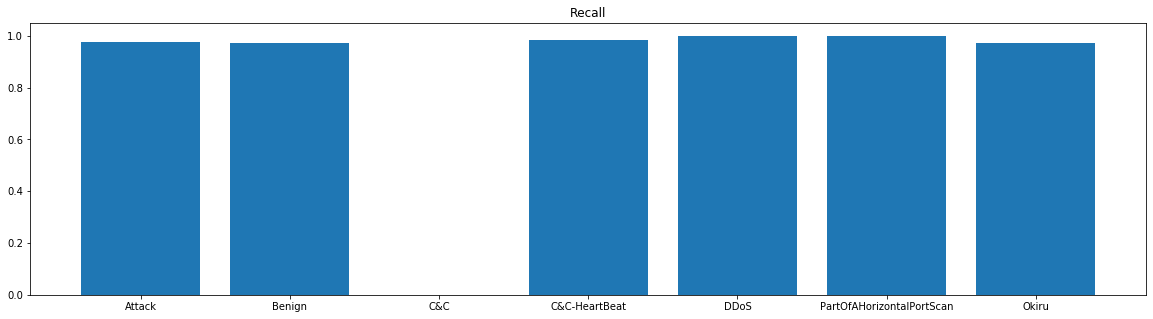

In [52]:
plt.figure(figsize=(20,5))
plt.bar(labels, rscore[1:8])
plt.title('Recall')
plt.savefig('Recall')

In [53]:
f1_score(ytest,y_pred, average='weighted')

0.9964488039629513

In [49]:
labels = [ 'Attack','Benign','C&C','C&C-HeartBeat', 'DDoS',
           'PartOfAHorizontalPortScan', 'Okiru']